# Exploratory Data Analysis and Simple Linear Regression
This notebook demonstrates exploratory data analysis (EDA) and simple linear regression using a dataset on automobiles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Loading and Viewing the Dataset
Here, we load the dataset and display the first few rows to understand its structure.

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


## Exploring Columns of Interest
We look at the minimum and maximum values for the `Weight1000lb` column to understand its range.

In [3]:
df['Weight1000lb'].min()
df['Weight1000lb'].max()

5.14

## Visualizing Distributions
We create histograms to visualize the distributions of `Weight1000lb` and `MPG` columns.

<Axes: >

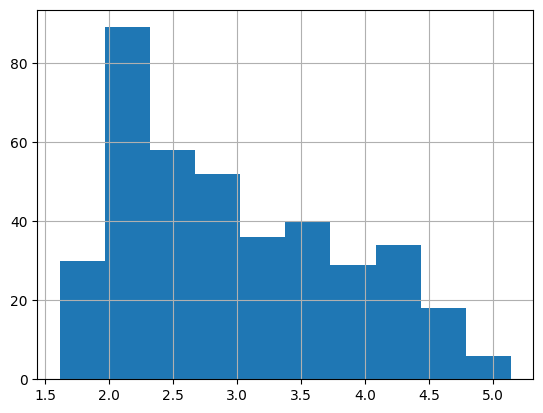

In [5]:
df['Weight1000lb'].hist()


<Axes: >

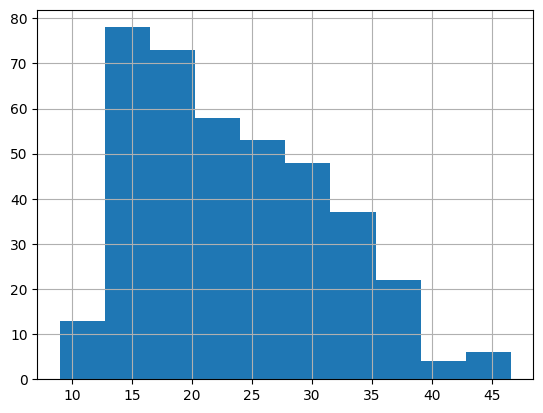

In [6]:
df['MPG'].hist()

## Pairwise Relationships
We use `sns.pairplot` to explore pairwise relationships among all numerical columns.

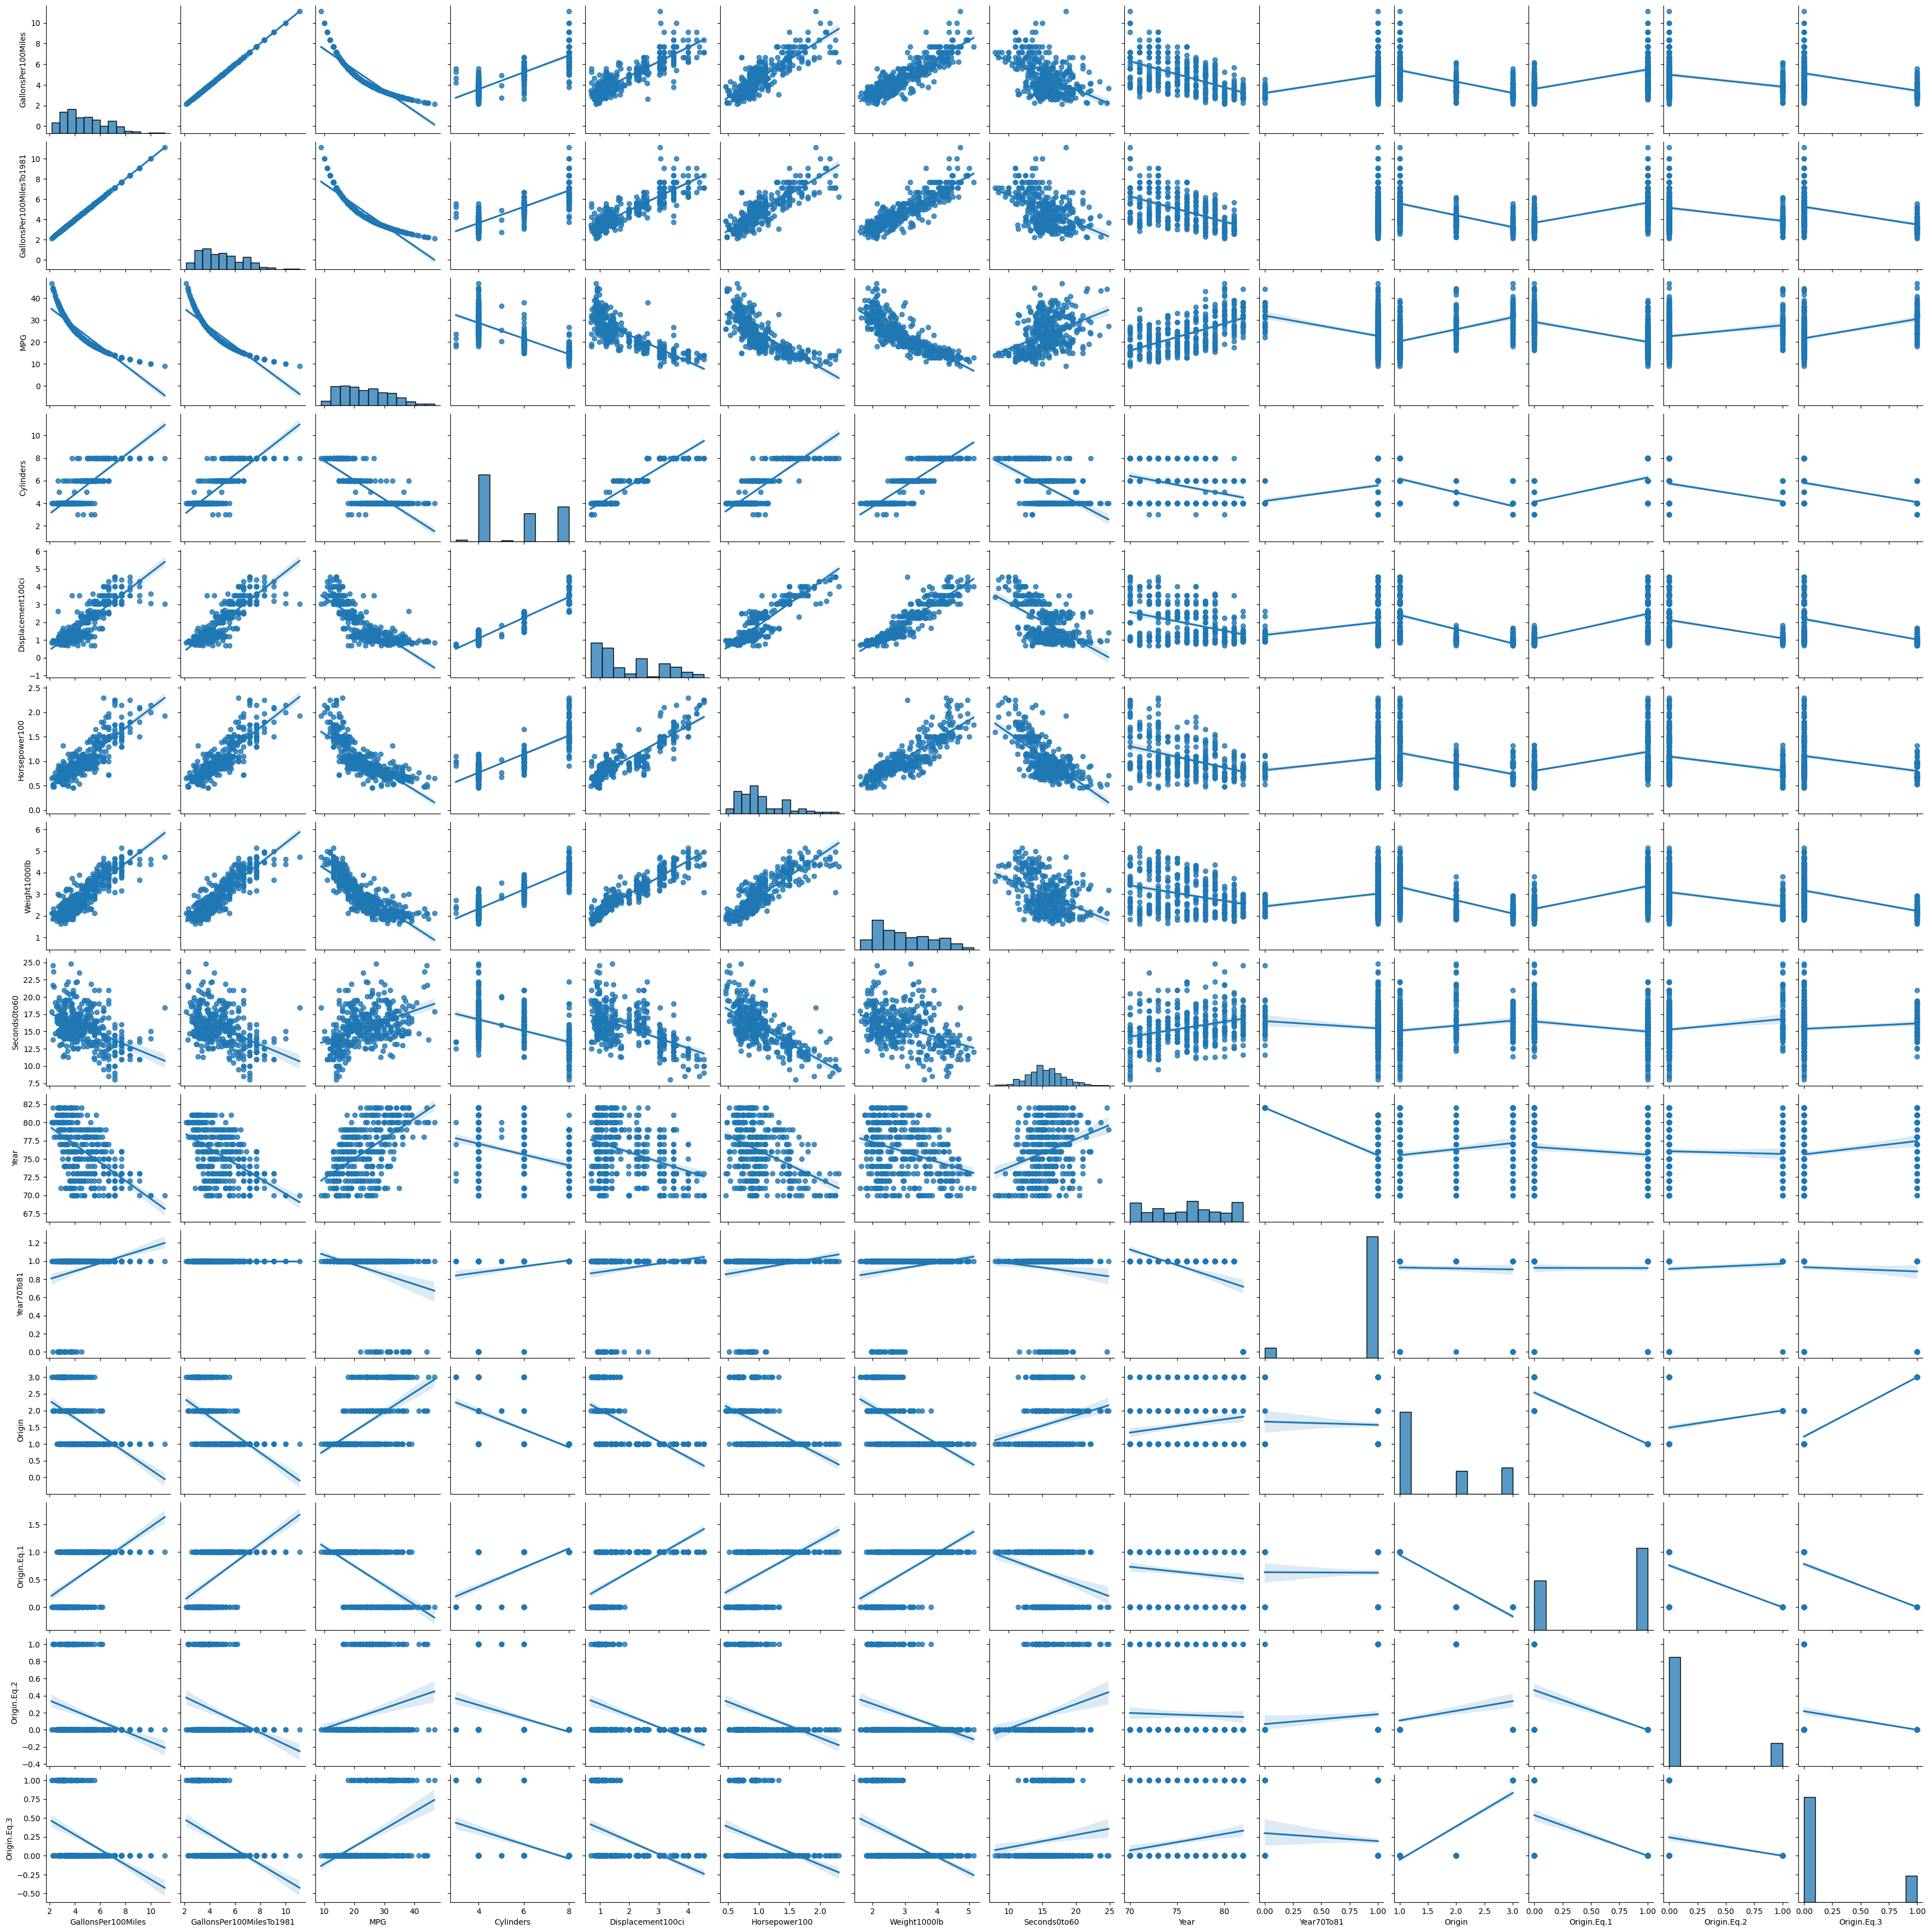

In [7]:
sns.pairplot(df, kind='reg')

## Correlation Analysis
Dropping non-numerical columns and computing the correlation matrix.

In [8]:
df.drop('Name', axis=1, inplace=True)
df.corr()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
GallonsPer100Miles,1.000000,1.000000,-0.935935,0.839385,0.866050,0.854809,0.885056,-0.456338,-0.558255,0.272419,-0.532932,0.546366,-0.264829,-0.409405
GallonsPer100MilesTo1981,1.000000,1.000000,-0.934841,0.835720,0.866894,0.853023,0.884828,-0.461391,-0.508736,NaN,-0.560899,0.579838,-0.299749,-0.417987
MPG,-0.935935,-0.934841,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.315908,0.565209,-0.565161,0.244313,0.451454
Cylinders,0.839385,0.835720,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.214933,-0.568932,0.610494,-0.352324,-0.404209
Displacement100ci,0.866050,0.866894,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.182566,-0.614535,0.655936,-0.371633,-0.440825
Horsepower100,0.854809,0.853023,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.172258,-0.455171,0.489625,-0.284948,-0.321936
Weight1000lb,0.885056,0.884828,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.184409,-0.585005,0.600978,-0.293841,-0.447929
Seconds0to60,-0.456338,-0.461391,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.101206,0.212746,-0.258224,0.208298,0.115020
Year,-0.558255,-0.508736,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.471084,0.181528,-0.136065,-0.037745,0.199841
Year70To81,0.272419,NaN,-0.315908,0.214933,0.182566,0.172258,0.184409,-0.101206,-0.471084,1.000000,-0.032254,-0.004955,0.081198,-0.070666


## Visualizing Correlations
We use a heatmap to visualize the correlations between numerical columns.

<Axes: >

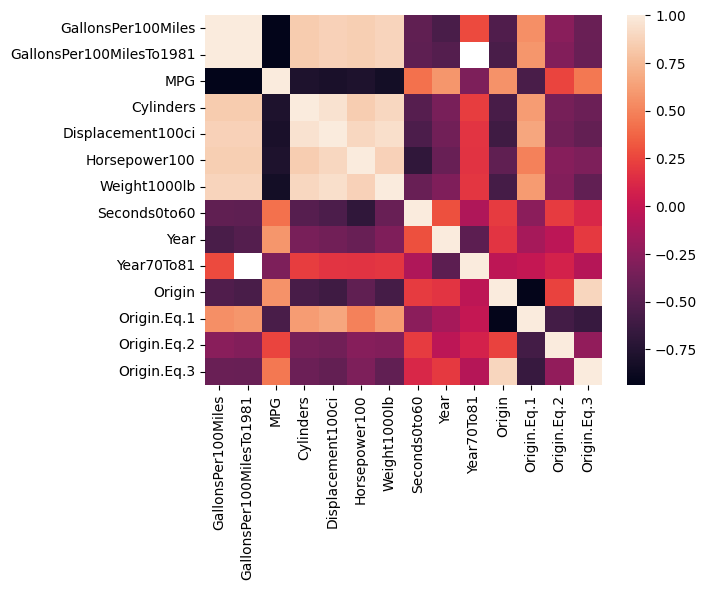

In [9]:
sns.heatmap(df.corr())

## Joint Distributions
Creating joint plots to explore relationships between key variables.

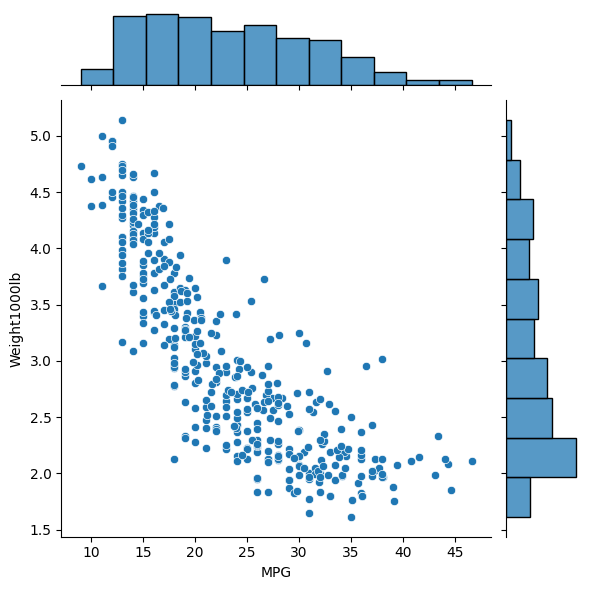

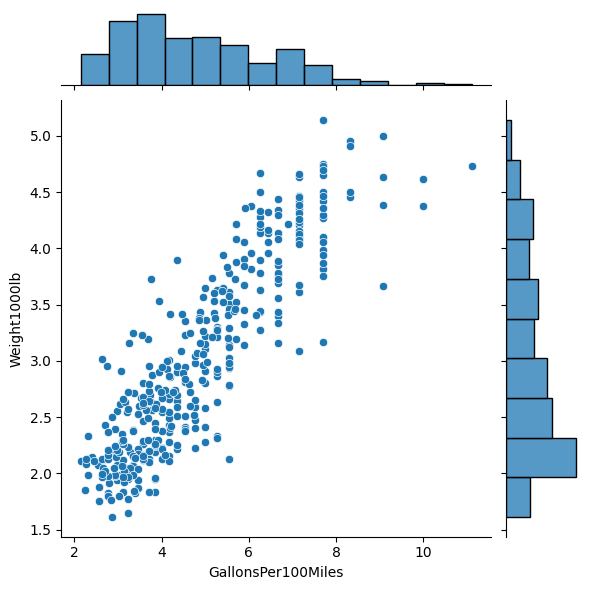

In [10]:
sns.jointplot(data=df, x='MPG', y='Weight1000lb')
sns.jointplot(data=df, x='GallonsPer100Miles', y='Weight1000lb')

#### MPG vs. Weight (in 1000 lbs):

- Scatter Plot: Shows an expected negative correlation—heavier vehicles tend to have lower MPG, indicating reduced fuel efficiency as weight increases.
- Marginal Histograms: Highlight the most common ranges of MPG and Weight1000lb.

##### Gallons Per 100 Miles vs. Weight (in 1000 lbs):

- Scatter Plot: Demonstrates a positive correlation—heavier vehicles consume more fuel per 100 miles.
- Marginal Histograms: Show the distribution of GallonsPer100Miles and Weight1000lb.

Both plots confirm intuitive relationships between vehicle weight and fuel efficiency/consumption.

## Linear Regression Model
Building and evaluating a simple linear regression model.

In [ ]:
X = df['Weight1000lb'].to_frame() # Converts the Weight1000lb column into a DataFrame (required format for the regression model).
y = df['GallonsPer100Miles'] # the dependent variable (target), which is the fuel consumption in gallons per 100 miles.
fuel_model = LinearRegression().fit(X, y)
fuel_model.coef_, fuel_model.intercept_

(array([1.73378735]), -0.3802549901551391)

- For every additional 1000 lbs in vehicle weight, the fuel consumption (GallonsPer100Miles) increases by approximately 1.73 gallons per 100 miles.
- Practical Meaning: Heavier vehicles are less fuel-efficient and require more fuel for the same distance.
- The second value is the Intercept : This is the predicted value of GallonsPer100Miles when the weight of the vehicle (Weight1000lb) is 0.


## Making Predictions
Using the trained model to predict values for new data points.

In [ ]:
# Predict the fuel consumption (GallonsPer100Miles) for vehicles weighing 3000 lbs (3 in Weight1000lb) and 1000 lbs (1 in Weight1000lb).
fuel_model.predict(pd.DataFrame([3]))
fuel_model.predict(pd.DataFrame([1]))

c:\Users\s1006\.conda\envs\devAI\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\s1006\.conda\envs\devAI\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.35353236])

## Residual Analysis
Visualizing residuals to evaluate the fit of the regression model.

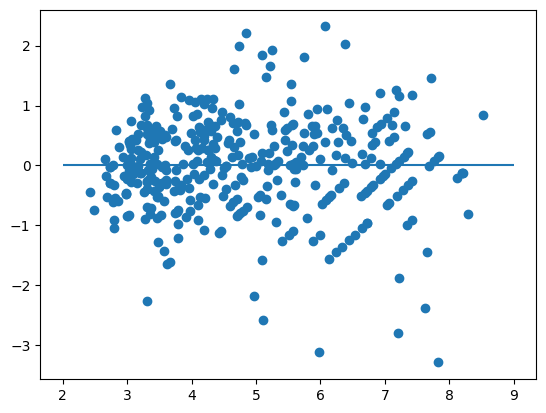

In [13]:
plt.scatter(fuel_model.predict(X), fuel_model.predict(X) - y)
plt.hlines(y=0, xmin=2, xmax=9)

- X-axis: Predicted values of GallonsPer100Miles (fuel_model.predict(X)).
- Y-axis: Residuals, calculated as the difference between predicted values and actual values (fuel_model.predict(X) - y).

- Residuals above this line indicate that the model over-predicted fuel consumption.
- Residuals below this line indicate that the model under-predicted fuel consumption.

- The residuals are distributed around the horizontal line at 𝑦=0, with no obvious pattern. This suggests the model reasonably fits the data.
- Most residuals are close to zero, indicating that the predictions are generally accurate.
- Larger residuals (points farther from the line) indicate instances where the model's predictions deviate more significantly from actual values.
- There is no clear curve or systematic trend in the residuals, supporting the assumption of linearity.
- Points significantly above or below the line might be outliers or instances where the model underperforms.

## Model Performance
Calculating the R-squared score to assess the performance of the model.

In [14]:
fuel_model.score(X, y)

0.7833240828863839

- The R-squared value indicates that approximately 78.33% of the variability in the target variable (GallonsPer100Miles) can be explained by the predictor variable (Weight1000lb).
- A score of 0.7833 suggests that the model provides a strong fit to the data but does not capture all the variability. There might be other factors influencing GallonsPer100Miles that are not included in the model.
- **Room for Improvement:** Adding more relevant features (e.g., Horsepower100, Cylinders) or using a more complex model might improve the R-squared value.


#### More Features
- creates three sets of independent variables (X1, X2, X3) for predicting the dependent variable y = df['GallonsPer100Miles']. Each set includes a different combination of features from the dataset.
- X1: Includes all key features related to engine specifications and vehicle dynamics for predicting GallonsPer100Miles. This comprehensive set might provide the most accurate predictions.
- X2: Focuses on engine power and vehicle weight, excluding Cylinders and Seconds0to60. It assumes these three features are the most directly relevant to fuel consumption.
- X3: Uses the number of cylinders, engine size, and acceleration time, omitting Horsepower100 and Weight1000lb. This set might emphasize the physical properties of the engine and vehicle performance over weight.


In [15]:
y = df['GallonsPer100Miles']
X1 = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]

In [16]:
fuel_model1 = LinearRegression().fit(X1,y)
fuel_model2 = LinearRegression().fit(X2,y)
fuel_model3 = LinearRegression().fit(X3,y)

In [17]:
print(fuel_model1.score(X1,y))
print(fuel_model2.score(X2,y))
print(fuel_model3.score(X3,y))

0.8207948199718269
0.8158213878482583
0.7529103569205208


- Model with X1: This model has the highest R-squared score, meaning it explains approximately 82.08% of the variability in GallonsPer100Miles. Including all five features provides the best fit to the data.